In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.linear_model import LinearRegression
from pandas import date_range
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

/Users/dayejoo/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# header=0 : CSV 파일의 첫 번째 줄이 열 이름을 포함하고 있다는 것을 나타내며, 이를 데이터프레임의 열 이름으로 사용
# 데이터 불러오기
df_holidays = pd.read_csv('holidays_events.csv', encoding = 'cp949', header = 0)
df_oil = pd.read_csv("oil.csv", encoding = 'cp949', header = 0)
df_stores = pd.read_csv("stores.csv", encoding = 'cp949', header = 0)
df_trans = pd.read_csv("transactions.csv", encoding = 'cp949', header = 0)

df_train = pd.read_csv("train.csv", encoding = "cp949", header = 0)
df_test = pd.read_csv("test.csv", encoding = "cp949", header = 0)

In [3]:
# 날짜형식 변환
df_holidays['date'] = pd.to_datetime(df_holidays['date'], format = "%Y-%m-%d")
df_oil['date'] = pd.to_datetime(df_oil['date'], format = "%Y-%m-%d")
df_trans['date'] = pd.to_datetime(df_trans['date'], format = "%Y-%m-%d")
df_train['date'] = pd.to_datetime(df_train['date'], format = "%Y-%m-%d")
df_test['date'] = pd.to_datetime(df_test['date'], format = "%Y-%m-%d")

In [4]:
df_train['onpromotion']

0            0
1            0
2            0
3            0
4            0
          ... 
3000883      0
3000884      1
3000885    148
3000886      8
3000887      0
Name: onpromotion, Length: 3000888, dtype: int64

In [24]:
df_train.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [5]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
# df_train.loc[df_train['family']=='AUTOMOTIVE']
df_train.loc[(df_train['family']=='AUTOMOTIVE')&(df_train['date']=='2013-01-02')]

,id,date,store_nbr,family,sales,onpromotion
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0
1815,1815,2013-01-02,10,AUTOMOTIVE,3.0,0
1848,1848,2013-01-02,11,AUTOMOTIVE,12.0,0
1881,1881,2013-01-02,12,AUTOMOTIVE,4.0,0
1914,1914,2013-01-02,13,AUTOMOTIVE,7.0,0
1947,1947,2013-01-02,14,AUTOMOTIVE,8.0,0
1980,1980,2013-01-02,15,AUTOMOTIVE,4.0,0
2013,2013,2013-01-02,16,AUTOMOTIVE,5.0,0
2046,2046,2013-01-02,17,AUTOMOTIVE,8.0,0
2079,2079,2013-01-02,18,AUTOMOTIVE,1.0,0


In [7]:
# 날짜별 매출 데이터 생성
store_sales = df_train.copy()
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()

In [8]:
# 카테고리별 각 날짜 판매 평균값 & 판매중 제품비율
# 2017년 
family_sales = (
    store_sales
    .groupby(['family', 'date'])
    .mean()
    .unstack('family')
    .loc['2017', ['sales', 'onpromotion']]
)
family_sales.head()

sales                                              \
family     AUTOMOTIVE BABY CARE     BEAUTY    BEVERAGES     BOOKS   
date                                                                
2017-01-01   0.092593  0.037037   0.055556    74.222222  0.000000   
2017-01-02  11.481481  0.259259  11.648148  6208.055556  0.481481   
2017-01-03   8.296296  0.296296   7.185185  4507.814815  0.814815   
2017-01-04   6.833333  0.333333   6.888889  3911.833333  0.759259   
2017-01-05   6.333333  0.351852   5.925926  3258.796296  0.407407   

                                                                           \
family     BREAD/BAKERY CELEBRATION     CLEANING        DAIRY        DELI   
date                                                                        
2017-01-01     9.084685    0.129630     7.500000    11.518519    3.629167   
2017-01-02   844.836296   14.203704  2233.648148  1545.000000  539.114833   
2017-01-03   665.124111   10.629630  1711.907407  1204.203704  404.300074   
2017-01-04   594.160611   11.185185  1508.037037  1107.796296  309.397685   
2017-01-05   495.511611   12.444444  1241.833333   829.277778  260.776500   

            ... onpromotion                                       \
family      ...   MAGAZINES     MEATS PERSONAL CARE PET SUPPLIES   
date        ...                                                    
2017-01-01  ...         0.0  0.018519      0.111111     0.018519   
2017-01-02  ...         0.0  0.462963     10.592593     0.537037   
2017-01-03  ...         0.0  0.481481      9.722222     0.444444   
2017-01-04  ...         0.0  0.370370     12.037037     0.444444   
2017-01-05  ...         0.0  8.981481      5.666667     0.000000   

                                                                         \
family     PLAYERS AND ELECTRONICS   POULTRY PREPARED FOODS     PRODUCE   
date                                                                      
2017-01-01                     0.0  0.000000       0.037037    0.129630   
2017-01-02                     0.0  0.259259       1.166667    5.629630   
2017-01-03                     0.0  0.388889       1.351852   56.296296   
2017-01-04                     0.0  0.296296       5.444444  101.277778   
2017-01-05                     0.0  0.296296       0.907407    5.018519   

                                                 
family     SCHOOL AND OFFICE SUPPLIES   SEAFOOD  
date                                             
2017-01-01                        0.0  0.000000  
2017-01-02                        0.0  0.407407  
2017-01-03                        0.0  0.407407  
2017-01-04                        0.0  0.333333  
2017-01-05                        0.0  0.444444  

[5 rows x 66 columns]

In [9]:
# MAGAZINES 카테고리만 보기 
mag_sales = family_sales.loc(axis=1)[:, 'MAGAZINES']
mag_sales

,sales,onpromotion
family,MAGAZINES,MAGAZINES
date,,
2017-01-01,0.074074,0.0
2017-01-02,7.777778,0.0
2017-01-03,3.500000,0.0
2017-01-04,3.500000,0.0
2017-01-05,3.203704,0.0
...,...,...
2017-08-11,9.259259,0.0
2017-08-12,8.944444,0.0


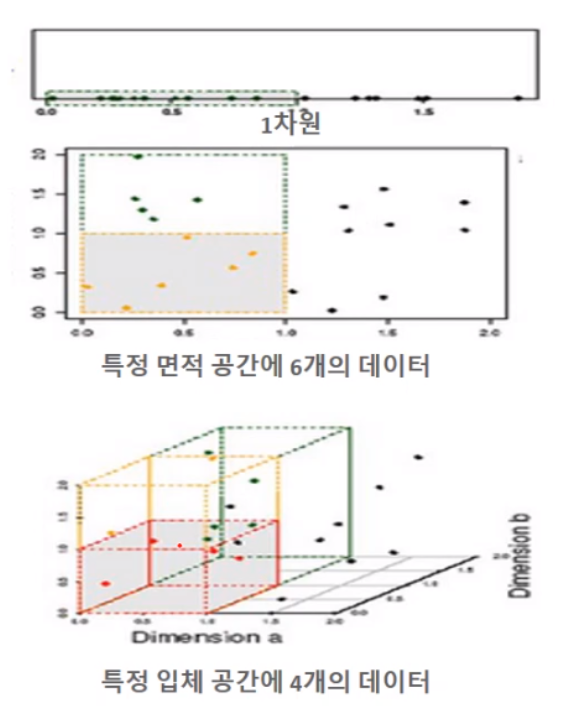

In [10]:
mag_sales.loc[:, 'sales']

family,MAGAZINES
date,
2017-01-01,0.074074
2017-01-02,7.777778
2017-01-03,3.500000
2017-01-04,3.500000
2017-01-05,3.203704
...,...
2017-08-11,9.259259
2017-08-12,8.944444
2017-08-13,8.685185


In [11]:
mag_sales.loc[:, 'sales'].squeeze()

date
2017-01-01    0.074074
2017-01-02    7.777778
2017-01-03    3.500000
2017-01-04    3.500000
2017-01-05    3.203704
                ...   
2017-08-11    9.259259
2017-08-12    8.944444
2017-08-13    8.685185
2017-08-14    8.462963
2017-08-15    8.537037
Freq: D, Name: MAGAZINES, Length: 227, dtype: float64

# 모델링

Text(0.5, 1.0, 'Magazine Sales (deseasonalized)')

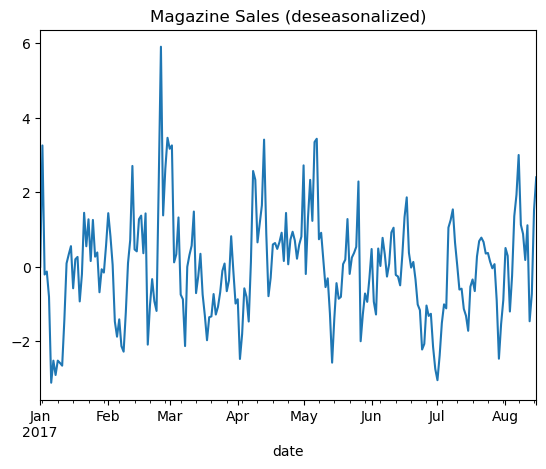

In [12]:
y = mag_sales.loc[:, 'sales'].squeeze()
# .squeeze() 차원축소 : dataframe > series

############

fourier = CalendarFourier(freq = 'M', order = 4)
# CalendarFourier() : 시계열 데이터에서 발생하는 계절성을 모델링하기 위해 사용-> 푸리에 계수생성
# freq :계절성 주기 / order : 푸리에(Fourier) 변환에서 사용되는 다항식의 차수를 나타내며, 계절성의 복잡도를 제어
# 푸리에 변환 : 시계열 데이터에서 발생하는 주기성을 분해
# 푸리에 계수 : 주기성 정보
# DeterministicProcess() : 시간 추세 모델링 


#시계열 데이터 : 불규칙한 요인 + 결정론적 요인(예측 가능한 패턴)
# 결정론적요인을 모델링 해주는 클래스
# 기본 값들 + 추가가능 
dp = DeterministicProcess(
    constant = True, # 모델에 절편추가
    index = y.index,# 모델에 사용할 인덱스 지정
    order = 1,# 차분의 차수를 1로설정
    seasonal = True,# 계절성 패턴을 모델링하기 위한 계절성 구성요소 추가
    drop = True,# null값있는 행 제거
    additional_terms = [fourier] # 위의 계절성을 모델링하는함수로 계절성 패턴을 모델링하는 구성요소 추가
)
X_time = dp.in_sample()
# 위의 DeterministicProcess 클래스의 인스턴스에서 사용
# .in_sample() : 인덱스 기반으로 예측변수행렬 생성
# 모델링된 결정론적 요인을 활용하여, 해당 시계열 데이터에 대한 결정론적 예측값을 생성하는 함수

############

X_time['NewYearsDay'] = (X_time.index.dayofyear == 1)
# 각각 해당 날짜가 1월1일인지 아닌지 boolean값 생성

model = LinearRegression(fit_intercept = False)
# 선형회귀모델 (절편 고려x)
# X_time을 이용하여 y값 예측
model.fit(X_time, y)

#### 계절성 제거
# y시계열에서 계절성 제거한 변수 만들기
y_deseason = y - model.predict(X_time)
y_deseason.name = 'sales_deseasoned'


ax = y_deseason.plot()
ax.set_title("Magazine Sales (deseasonalized)")

# lag plot을 그리는 함수

In [13]:
# 시계열의 직렬의존성을 볼 수 있다. 일반적으로 자기상관으로 측정치를 사용하며 이는 단순히 시계열이 자신의 lag 중 하나와 가지는 상관 관계
# 부분 자기상관은 이전 모든 lag을 고려한 lag의 상관 관계
# 즉, lag가 기여하는 “새로운” 상관 관계의 양

# lagged values)과 해당 시리즈의 값들을 플로팅해주는 함수입니다. 플로팅된 그래프는 특정 시간 단위의 시리즈 값들과 이전 시점의 값들 간의 상관관계를 보여줌
def lagplot(x, y = None, lag = 1, standardize = False, ax = None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    #그래프의 특정 위치에 텍스트를 추가하기 위한 기능을 제공합니다. 이 기능은 그래프에 주석을 추가하는 것과 유사하지만, 주석과 달리 위치가 고정되며 그래프가 이동하더라도 같은 위치에 텍스트가 유지됩니다. 일반적으로 그래프의 범례나 통계량을 추가하는 데 사용합니다.

    # x를 lag시차만큼 이동시킨 시리즈 생성 
    x_ = x.shift(lag)

    # standardize가 True인 경우에는 표준화
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    # y와 x_ 시리즈 간의 상관관계를 계산하여 corr 변수에 저장  
    corr = y_.corr(x_)

    # lag plot을 그리고, 상관계수를 표시하는 텍스트 박스를 추가
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(alpha = 0.75, s = 3) # alpha:투명도 / s:점크기
    line_kws = dict(color = 'C3', )
    ax = sns.regplot(x = x_, y = y_, scatter_kws = scatter_kws, line_kws = line_kws, lowess = True, ax = ax, **kwargs)

    at = AnchoredText(f"{corr:2f}", prop = dict(size = "large"), frameon = True, loc = "upper left")
# s’ : 표시할 문자열입니다.
# ‘loc’ : 텍스트 박스를 배치할 위치입니다 (ex: ‘loc = ‘upper left’)
# ‘prop’ : 텍스트 속성
# ‘frameon’ : 박스 외각선 표시 여부 (True 또는 False)
# ‘bbox_to_anchor’ : 박스의 위치를 좌표로 지정합니다. ‘loc’과 함께 사용됩니다.
# ‘pad’ : 박스와 문자열 사이의 여백입니다.
# ‘borderpad’ : 박스와 외곽과의 여백

    at.patch.set_boxstyle("square, pad = 0.0")
    #AnchoredText의 패치에 박스 스타일을 설정하는 코드입니다. 패치는 텍스트의 배경 부분을 의미합니다. ‘Square’는 박스의 모양을 사각형으로 설정하고 ‘pad = 0.0’은 박스와 텍스트 사이의 간격을 0으로 설정합니다. 이렇게 하면 텍스트가 박스에 꽉 차게 표시
    ax.add_artist(at)
    #그래프 내부의 특정 위치에 텍스트 박스를 추가하는 데 사용
    ax.set(title = f"Lag {lag}", xlabel = x_.name, ylabel = y_.name)
    return ax


In [14]:
# 시계열 데이터의 여러 시차(lag)를 한 번에 시각화
def plot_lags(x, y = None, lags = 6, nrows = 1, lagplot_kwargs = {}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    # ‘nrows’가 ‘kwargs’ 딕셔너리에 이미 존재하는 경우에는 ‘nrows’ 값을 반환, 존재하지 않는 경우 ‘nrows’ 키와 그 값을 추가. 즉, ‘nrows’가 따로 입력되지 않은 경우에는 ‘nrows’의 기본값인 1
    # 안의 내용보다 큰 최소의 정수 = 올림 정수값
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2 + 10, nrows * 2 + 5))
    
    fig, axs = plt.subplots(sharex = True, sharey = True, squeeze = False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag = k + 1, ax = ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict = dict(fontsize = 14))
            ax.set(xlabel = "", ylabel = "")
        else:
            ax.axis('off')
            
    plt.setp(axs[-1, :], xlabel = x.name)
    plt.setp(axs[:, 0], ylabel = y.name if y is not None else x.name)
    fig.tight_layout(w_pad = 0.1, h_pad = 0.1)
    return fig

In [21]:
y_deseason.head()


date
2017-01-01    3.164136e-14
2017-01-02    3.257003e+00
2017-01-03   -2.105813e-01
2017-01-04   -1.304980e-01
2017-01-05   -8.081456e-01
Freq: D, Name: sales_deseasoned, dtype: float64

/Users/dayejoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


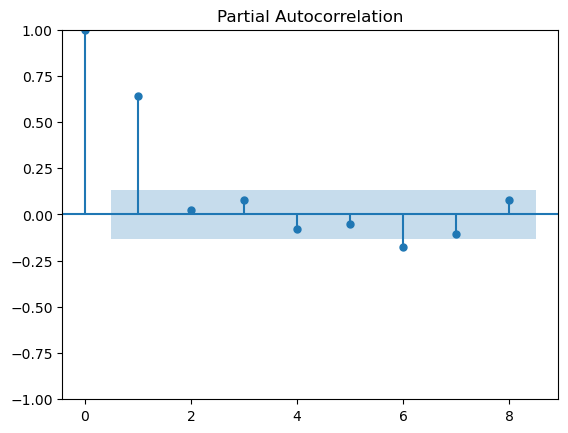

In [15]:
# 시계열의 시차간의 부분자기상관계수에 대한 차트 
from statsmodels.graphics.tsaplots import plot_pacf
_ = plot_pacf(y_deseason, lags = 8)

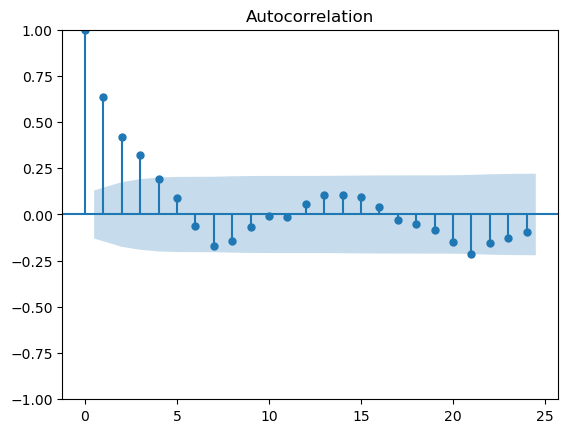

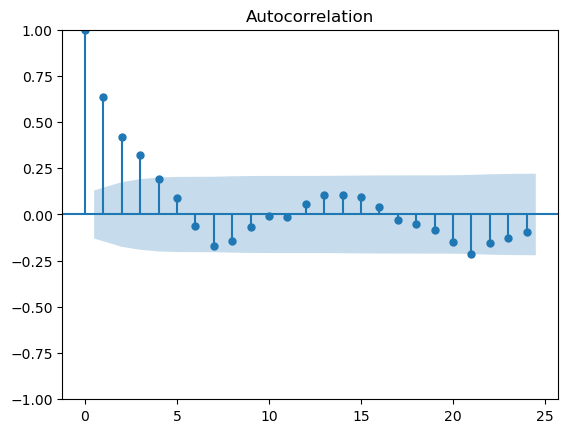

In [23]:
# ACF 자기상관관계 그래프로 걍 그려봄 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y_deseason)

/Users/dayejoo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


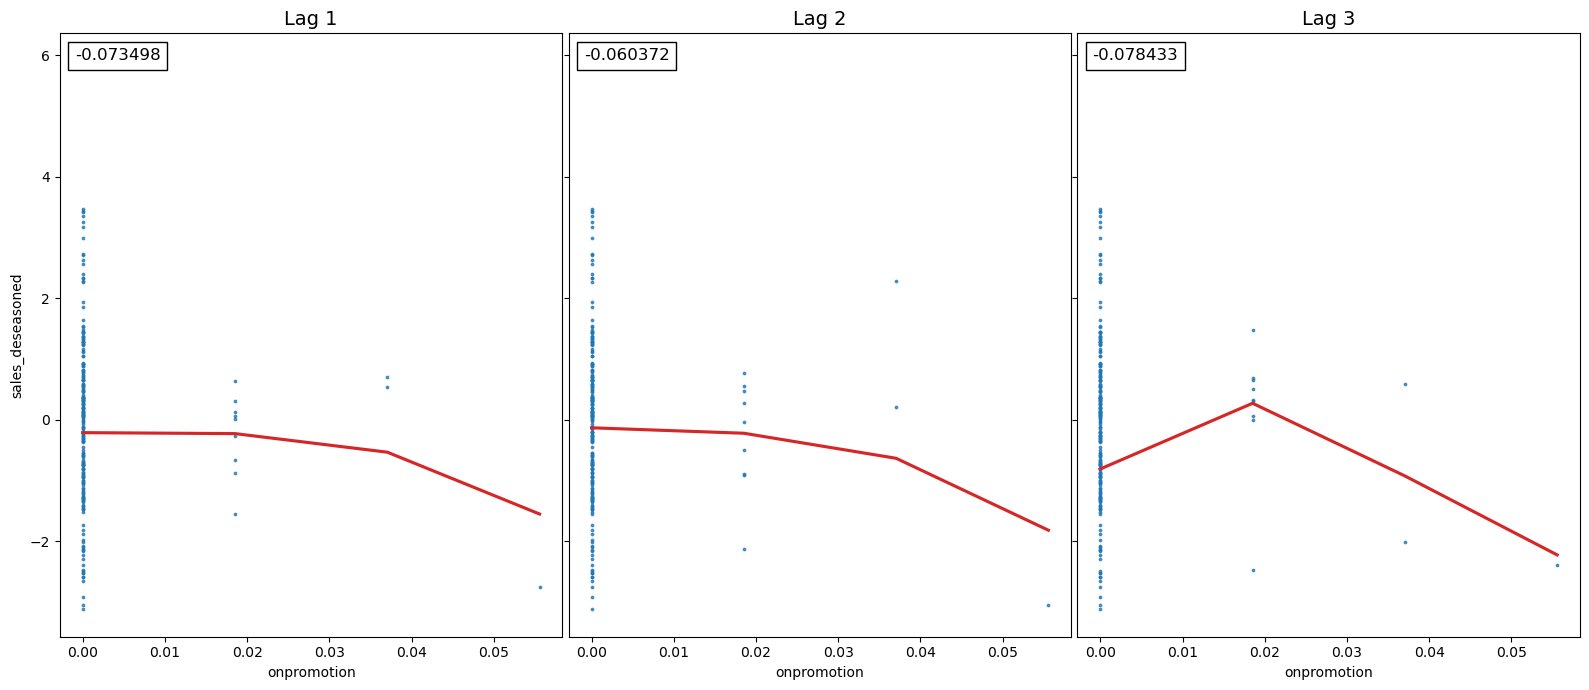

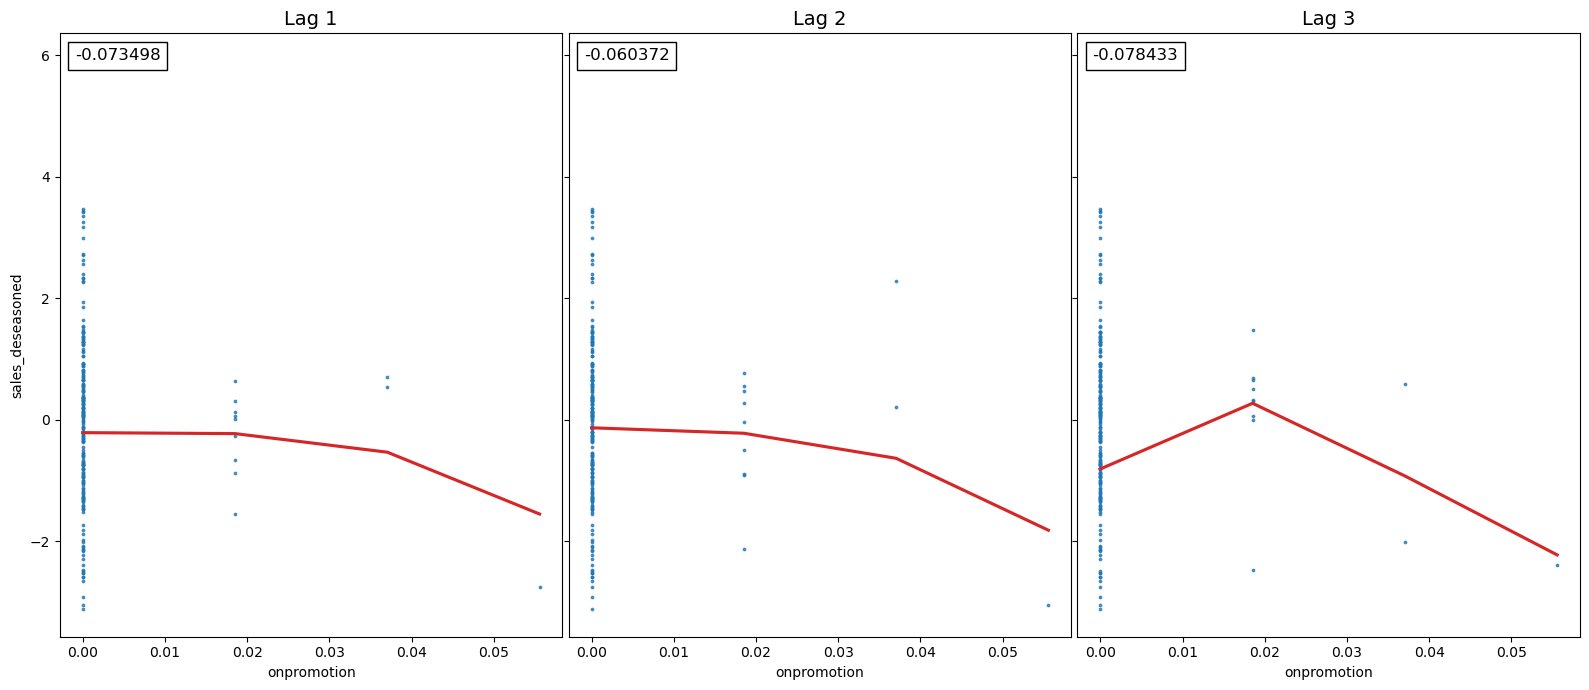

In [16]:
# 잡지 판매량에 대해 플롯된 onpromotion의 선행 및 후행 값
onpromotion = mag_sales.loc[:, 'onpromotion'].squeeze().rename('onpromotion')

# Drop the New Year outlier
plot_lags(x = onpromotion.iloc[1:], y = y_deseason.iloc[1:], lags = 3, nrows = 1)

# Lags. ForecastingPermalink

In [17]:
# 시계열 데이터와 lag값 넣어서 lagged values 생성하는 함수
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}' : ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis = 1
    )

In [18]:
#  ‘make_lags’ 함수를 이용해 시계열 데이터 ‘y_deseason’의 lag 값을 구하고, ‘NaN’ 값을 0.0으로 채워서 ‘X’ 데이터프레임을 생성
X = make_lags(y_deseason, lags = 4)
X = X.fillna(0.0)

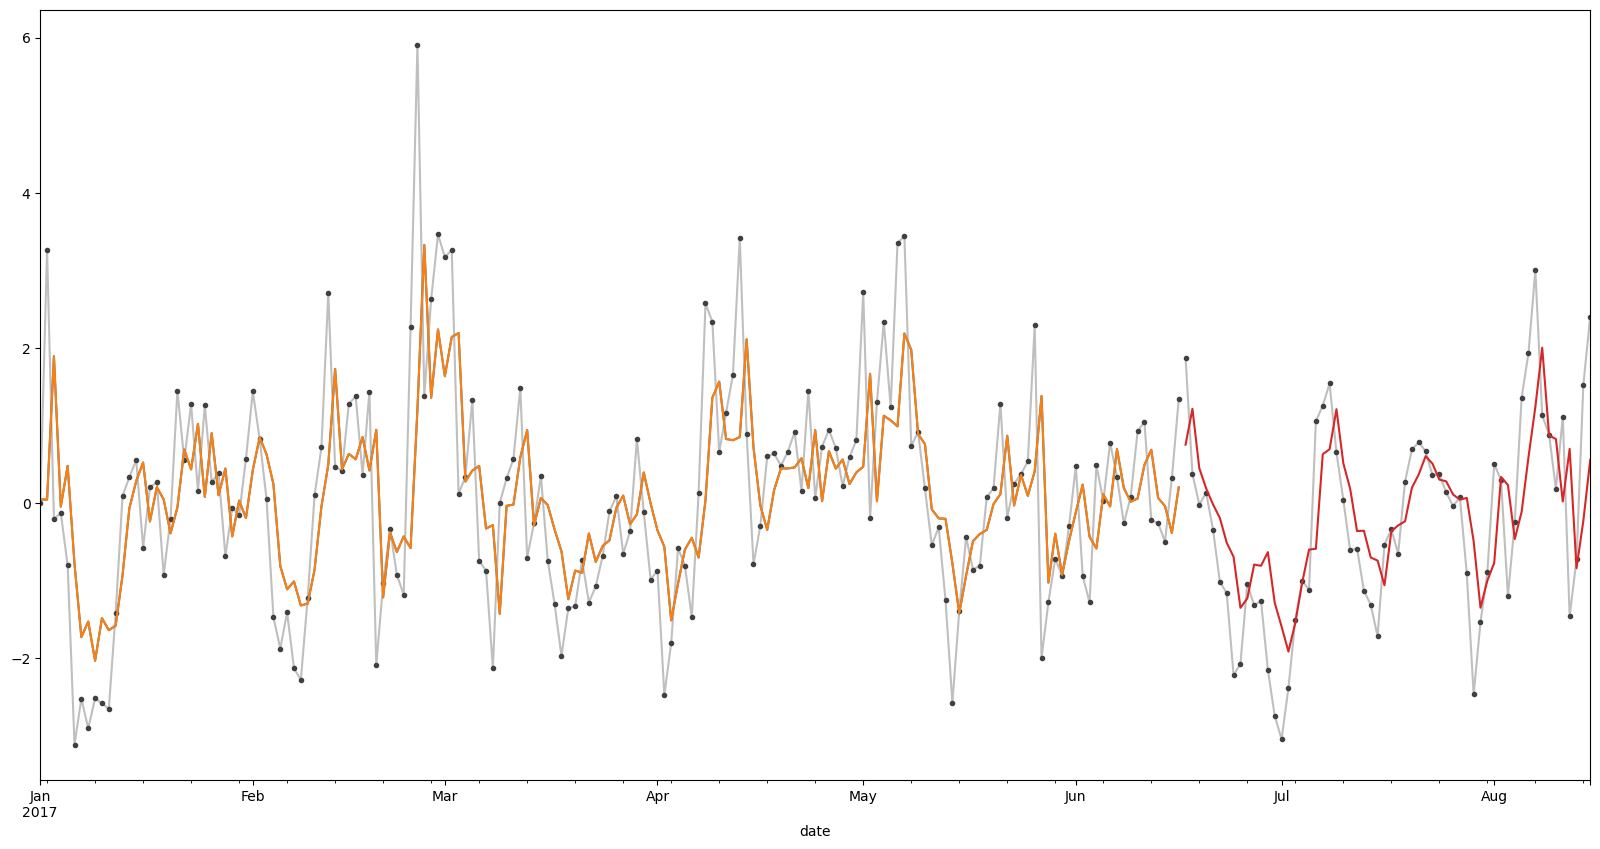

In [19]:

y = y_deseason.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 60, shuffle = False)


model = LinearRegression() # 'fit_intercept = True' since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index = y_train.index)
y_fore = pd.Series(model.predict(X_test), index = y_test.index)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
ax = y_train.plot(color = "0.75", style = ".-", markeredgecolor = "0.25", markerfacecolor = "0.25", ax = ax)
ax = y_test.plot(color = "0.75", style = ".-", markeredgecolor = "0.25", markerfacecolor = "0.25", ax = ax)
ax = y_pred.plot(ax = ax)
ax = y_pred.plot(ax = ax)
_ = y_fore.plot(ax = ax, color = 'C3')
plt.show()

# ‘y_train’과 ‘y_test’는 회색으로, ‘y_pred’는 파랑색으로, ‘y_fore’는 빨간색으로 표시
#  타겟 시계열의 실제 값과 모델 예측 값을 시각적으로 비교